In [1]:
from geojson import Point, Feature, FeatureCollection, dump
import geopandas
import requests
import geojson
from pathlib import Path
import os
from s3fs import S3FileSystem
from dotenv import load_dotenv
import click

load_dotenv()
%load_ext autoreload
%autoreload 2

OPEN EMODNET SEABED 2019

In [3]:
# https://ows.emodnet-seabedhabitats.eu/geoserver/emodnet_open/wfs?SERVICE=WFS&request=getFeature&VERSION=2.0.0&typeName=emodnet_open:eusm2021_bio_full&outputFormat=application/json&bbox=-1413232,6288190,-365497,6914553"

In [4]:
url = "https://ows.emodnet-seabedhabitats.eu/geoserver/emodnet_open/wfs?"
options = {
    'SERVICE':'WFS',
    'request':'getFeature',
    'VERSION':'2.0.0',
    'typeName':'emodnet_open:eusm2021_bio_full',
    'outputFormat':'application/json',
    'bbox':'-1413232,6288190,-365497,6914553'
}
output = 'haigfras_biozones.geojson'
bbox=[-1413232,6288190,-365497,6914553]

In [30]:
from process_emodnet_geojson import ProcessGeoJson

In [31]:
p = ProcessGeoJson(input_url = url, input_options = options, output=output, bbox=bbox)

In [32]:
p.download_emodnet_wfs()

downloading data
data downloaded


In [33]:
p.clip_geojson()

In [39]:
p.file_clipped

'clipped_haigfras_biozones.geojson'

In [41]:
remote_path = f"s3://{p.bucket}/{p.file_clipped}"
remote_path

's3://haig-fras/clipped_haigfras_biozones.geojson'

In [52]:
from s3fs import S3FileSystem
s3 = S3FileSystem(anon=False,
                key=p.__jasmin_token,
                secret=p.__jasmin_secret,
                client_kwargs={"endpoint_url": p.__jasmin_api_url})

remote_path = f"s3://{p.bucket}/{p.file_clipped}"


In [53]:
with s3.open(remote_path, mode="wb", s3=dict(profile="default")) as remote_file:
    with open(f'data/{p.file_clipped}', mode="rb") as local_file:
        remote_file.write(local_file.read())

In [38]:
p.upload_jasmine()

Unable to locate credentials


NoCredentialsError: Unable to locate credentials

In [18]:
with open(p.output) as f:
    gj = geojson.load(f)

In [22]:
gj['features'][0]['properties']

{'euseamap_r': 'Atlanto-Arctic',
 'shape_leng': 363108002.913,
 'shape_area': 40035564441600}

In [ ]:
class ProcessGeoJson():


In [127]:
url_file = "https://ows.emodnet-seabedhabitats.eu/geoserver/emodnet_open/wfs?SERVICE=WFS&request=getFeature&VERSION=2.0.0&typeName=emodnet_open:eusm2019_regions&outputFormat=application/json&bbox=-1413232,6288190,-365497,6914553"
r = requests.get(url_file)

In [128]:
with open('haigfras_seabed_2019.geojson', 'w') as f:
   dump(r.json(), f)
with open('data/haigfras.geojson') as f:
    gj = geojson.load(f)

'/home/tobfer/code/noc-gitlab/imfe-pilot/scripts/files_to_geojson/notebooks'

In [9]:
df = geopandas.read_file('../data/haigfras_biozones.geojson')

In [13]:
df[.biozone.unique()

array(['Atlantic lower abyssal', 'Atlantic mid bathyal',
       'Atlantic upper abyssal', 'Atlantic lower bathyal',
       'Atlantic mid abyssal', 'Atlantic upper bathyal',
       'Atlanto-Mediterranean mid bathyal', 'Deep circalittoral',
       'Infralittoral', 'Shallow circalittoral'], dtype=object)

In [ ]:
gj.feature

In [135]:
len(gj['features'][0])

6

In [132]:
df = geopandas.read_file('haigfras_seabed_2019.geojson')
new_df = geopandas.clip(gdf=df, mask=[-1413232,6288190,-365497,6914553], keep_geom_type=False)

DriverError: Failed to read GeoJSON data

OPEN EMODNET SEABED SUBSTRATE

In [ ]:
url_file = "https://ows.emodnet-seabedhabitats.eu/geoserver/emodnet_open/wfs?SERVICE=WFS&request=getFeature&VERSION=2.0.0&typeName=emodnet_open:eusm2021_subs_full&outputFormat=application/json&bbox=-1413232,6288190,-365497,6914553"
r = requests.get(url_file)

In [ ]:
with open('haigfras_seabed_substrate.geojson', 'w') as f:
   dump(r.json(), f)
with open('haigfras_seabed_substrate.geojson') as f:
    gj = geojson.load(f)

In [ ]:
for item in gj['features']:
    del item["properties"]['geom_200']
    del item["properties"]['geom_400']
    del item["properties"]['geom_800']
    
with open('haigfras_substrate.geojson', 'w') as f:
   dump(gj, f)

In [3]:
with open('haigfras_substrate.geojson') as f:
    gj = geojson.load(f)

In [4]:
len_total = len(gj['features'])

In [5]:
import numpy as np

In [ ]:
gdf = geopandas.GeoDataFrame()
for i in np.arange(0,len_total,1000):
    print(i)
    try:
        df = geopandas.read_file("haigfras_substrate.geojson", rows=slice(i,i+1000), bbox=(-1413232,6288190,-365497,6914553))
        gdf = gdf.append(df)        
    except Exception as e:
        print(e)

0
Failed to read GeoJSON data
1000
Failed to read GeoJSON data
2000
Failed to read GeoJSON data
3000
Failed to read GeoJSON data
4000
Failed to read GeoJSON data
5000
Failed to read GeoJSON data
6000
Failed to read GeoJSON data
7000


KeyboardInterrupt: 

Exception ignored in: 'fiona._env.log_error'
Traceback (most recent call last):
  File "/home/tobfer/.pyenv/versions/3.10.6/lib/python3.10/logging/__init__.py", line 2071, in getLogger
    def getLogger(name=None):
KeyboardInterrupt: 


Failed to read GeoJSON data
8000
Failed to read GeoJSON data
9000
Failed to read GeoJSON data
10000
Failed to read GeoJSON data
11000
Failed to read GeoJSON data
12000
Failed to read GeoJSON data
13000
Failed to read GeoJSON data
14000
Failed to read GeoJSON data
15000
Failed to read GeoJSON data
16000
Failed to read GeoJSON data
17000
Failed to read GeoJSON data
18000
Failed to read GeoJSON data
19000
Failed to read GeoJSON data
20000
Failed to read GeoJSON data
21000
Failed to read GeoJSON data
22000
Failed to read GeoJSON data
23000
Failed to read GeoJSON data
24000
Failed to read GeoJSON data
25000
Failed to read GeoJSON data
26000
Failed to read GeoJSON data
27000
Failed to read GeoJSON data
28000
Failed to read GeoJSON data
29000
Failed to read GeoJSON data
30000
Failed to read GeoJSON data
31000
Failed to read GeoJSON data
32000
Failed to read GeoJSON data
33000
Failed to read GeoJSON data
34000
Failed to read GeoJSON data
35000
Failed to read GeoJSON data
36000
Failed to read G

In [ ]:
df = geopandas.read_file("nybb.shp", rows=10)  
Reading only geometries intersecting mask:

df = geopandas.read_file("nybb.shp", mask=polygon)  
Reading only geometries intersecting bbox:

df = geopandas.read_file("nybb.shp", bbox=(0, 0, 10, 20))  

In [7]:
from osgeo import gdal

ds = gdal.OpenEx('haigfras_seabed_substrate.geojson')


In [18]:
ds.GetMetadata()

{}

In [8]:
layer = ds.GetLayer()
feature = layer.GetFeature(0)

print(ds.GetDriver().ShortName)
print(feature.GetGeometryRef().ExportToWkt())

GeoJSON
MULTIPOLYGON (((-599332.2698 6454384.9905,-599427.1741 6454351.375,-599471.8467 6454438.9994,-599324.9319 6454393.1538,-599332.2698 6454384.9905)))


In [9]:
print(feature.GetGeometryRef())

MULTIPOLYGON (((-599332.2698 6454384.9905,-599427.1741 6454351.375,-599471.8467 6454438.9994,-599324.9319 6454393.1538,-599332.2698 6454384.9905)))


In [ ]:
layer = ds.GetLayer()
feature = layer.GetFeature(0)

In [19]:
len(gj['features'])

159757

In [15]:
gj['features'][0]['properties']

{'substrate': 'Sediment',
 'shape_length': 363.915041575287,
 'shape_area': 5676.67207266843,
 'geom_200': {"coordinates": [], "type": "MultiPolygon"},
 'geom_400': {"coordinates": [], "type": "MultiPolygon"},
 'geom_800': {"coordinates": [], "type": "MultiPolygon"}}

In [16]:
for item in gj['features']:
    del item["properties"]['geom_200']
    del item["properties"]['geom_400']
    del item["properties"]['geom_800']
with open('haigfras_substrate.geojson', 'w') as f:
   dump(gj, f)

In [23]:
with open('haigfras_substrate.geojson', 'w') as f:
   dump(gj, f)

In [36]:
len(gj.features)

159757

In [44]:
input_path = Path('./')
files = list(input_path.glob("*_xaaa*.geojson"))

In [61]:
gdf = geopandas.GeoDataFrame()
for 
for file in files:
    print(file)
    try:
        df = geopandas.read_file(str(file))
        new_df = geopandas.clip(gdf=df, mask=[-1413232,6288190,-365497,6914553], keep_geom_type=False)
        new_df.to_json()
        gdf = gdf.append(new_df)        
    except Exception as e:
        print(e)

haigfras_substrate_xaaaa.geojson


/tmp/ipykernel_30873/510254483.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  gdf = gdf.append(new_df)


haigfras_substrate_xaaao.geojson


/tmp/ipykernel_30873/510254483.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  gdf = gdf.append(new_df)


haigfras_substrate_xaaam.geojson


/tmp/ipykernel_30873/510254483.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  gdf = gdf.append(new_df)


haigfras_substrate_xaaaq.geojson


/tmp/ipykernel_30873/510254483.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  gdf = gdf.append(new_df)


haigfras_substrate_xaaae.geojson
Failed to read GeoJSON data
haigfras_substrate_xaaah.geojson


/tmp/ipykernel_30873/510254483.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  gdf = gdf.append(new_df)


haigfras_substrate_xaaag.geojson


/tmp/ipykernel_30873/510254483.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  gdf = gdf.append(new_df)


haigfras_substrate_xaaal.geojson


/tmp/ipykernel_30873/510254483.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  gdf = gdf.append(new_df)


haigfras_substrate_xaaab.geojson


/tmp/ipykernel_30873/510254483.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  gdf = gdf.append(new_df)


haigfras_substrate_xaaai.geojson


/tmp/ipykernel_30873/510254483.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  gdf = gdf.append(new_df)


haigfras_substrate_xaaaf.geojson


/tmp/ipykernel_30873/510254483.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  gdf = gdf.append(new_df)


haigfras_substrate_xaaak.geojson


/tmp/ipykernel_30873/510254483.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  gdf = gdf.append(new_df)


haigfras_substrate_xaaad.geojson


/tmp/ipykernel_30873/510254483.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  gdf = gdf.append(new_df)


haigfras_substrate_xaaac.geojson


/tmp/ipykernel_30873/510254483.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  gdf = gdf.append(new_df)


haigfras_substrate_xaaaj.geojson


/tmp/ipykernel_30873/510254483.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  gdf = gdf.append(new_df)


haigfras_substrate_xaaap.geojson


/tmp/ipykernel_30873/510254483.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  gdf = gdf.append(new_df)


In [77]:
with open('haigfras_substrate_xaaae_xaaac_xaaab_xaaai_xaabe.geojson') as f:
    gj = geojson.load(f)

In [113]:
gj['features'][0]['properties']

{'substrate': 'Coarse substrate',
 'shape_length': 45952962.0972195,
 'shape_area': 13953138588.7864}

In [114]:
with open('haigfras_substrate_xaaae_xaaac_xaaab_xaaai_xaabe.geojson') as f:
    gj = geojson.load(f)

output = { "type": "FeatureCollection", "features": [] }

for feature in gj['features']:
    if (feature['geometry'] is not None) and (feature['geometry']['type'] == 'MultiPolygon'):
        for poly in feature['geometry']['coordinates'][0]:
            xfeature = { "type": "Feature", "properties": feature['properties'], "geometry": { "type": "Polygon" } }
            xfeature['geometry']['coordinates'] = poly
            output['features'].append(xfeature)

with open('polygons.geojson', 'w') as f:
   dump(output.json(), f)

52204141

In [120]:
with open('polygons.geojson', 'w') as f:
   dump(output, f)

In [ ]:
gj['features'][0]['geometry']['coordinates'][0][2]

In [121]:
df = geopandas.read_file('polygons.geojson')

In [122]:
df

,substrate,shape_length,shape_area,geometry
0,Coarse substrate,4.595296e+07,1.395314e+10,None
1,Coarse substrate,4.595296e+07,1.395314e+10,None
2,Coarse substrate,4.595296e+07,1.395314e+10,None
3,Coarse substrate,4.595296e+07,1.395314e+10,None
4,Coarse substrate,4.595296e+07,1.395314e+10,None
...,...,...,...,...
28374,Coarse substrate,4.595296e+07,1.395314e+10,None
28375,Coarse substrate,4.595296e+07,1.395314e+10,None
28376,Coarse substrate,4.595296e+07,1.395314e+10,None
28377,Coarse substrate,4.595296e+07,1.395314e+10,None


In [69]:
input_path = Path('./')
files = list(input_path.glob("*_xaaae_xaaac_xaaab_x*.geojson"))

In [70]:
for file in files:
    print(file)
    try:
        df = geopandas.read_file(str(file))
        new_df = geopandas.clip(gdf=df, mask=[-1413232,6288190,-365497,6914553], keep_geom_type=False)
        new_df.to_json()
        gdf = gdf.append(new_df)        
    except Exception as e:
        print(e)

haigfras_substrate_xaaae_xaaac_xaaab_xaaai_xaabg.geojson
haigfras_substrate_xaaae_xaaac_xaaab_xaaai_xaaal.geojson
haigfras_substrate_xaaae_xaaac_xaaab_xaaai_xaaai.geojson
haigfras_substrate_xaaae_xaaac_xaaab_xaaad.geojson
haigfras_substrate_xaaae_xaaac_xaaab_xaaai_xaabf.geojson
haigfras_substrate_xaaae_xaaac_xaaab_xaaai_xaaao.geojson
haigfras_substrate_xaaae_xaaac_xaaab_xaaai_xaaaj.geojson
haigfras_substrate_xaaae_xaaac_xaaab_xaaae.geojson
haigfras_substrate_xaaae_xaaac_xaaab_xaaab.geojson


/tmp/ipykernel_30873/2782387842.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  gdf = gdf.append(new_df)
/tmp/ipykernel_30873/2782387842.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  gdf = gdf.append(new_df)
/tmp/ipykernel_30873/2782387842.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  gdf = gdf.append(new_df)
/tmp/ipykernel_30873/2782387842.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  gdf = gdf.append(new_df)
/tmp/ipykernel_30873/2782387842.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  gdf = gdf.append(new_df)
/tmp/ipyke

haigfras_substrate_xaaae_xaaac_xaaab_xaaai_xaaby.geojson
haigfras_substrate_xaaae_xaaac_xaaab_xaaai_xaaaw.geojson
haigfras_substrate_xaaae_xaaac_xaaab_xaaaj.geojson
haigfras_substrate_xaaae_xaaac_xaaab_xaaai_xaabo.geojson
haigfras_substrate_xaaae_xaaac_xaaab_xaaai_xaabw.geojson
haigfras_substrate_xaaae_xaaac_xaaab_xaaaa.geojson
haigfras_substrate_xaaae_xaaac_xaaab_xaaai_xaaag.geojson
haigfras_substrate_xaaae_xaaac_xaaab_xaaai_xaaaq.geojson
haigfras_substrate_xaaae_xaaac_xaaab_xaaai_xaaab.geojson
haigfras_substrate_xaaae_xaaac_xaaab_xaaai_xaabh.geojson


/tmp/ipykernel_30873/2782387842.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  gdf = gdf.append(new_df)
/tmp/ipykernel_30873/2782387842.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  gdf = gdf.append(new_df)


haigfras_substrate_xaaae_xaaac_xaaab_xaaai_xaaac.geojson
haigfras_substrate_xaaae_xaaac_xaaab_xaaai_xaabe.geojson
Failed to read GeoJSON data
haigfras_substrate_xaaae_xaaac_xaaab_xaaai_xaabz.geojson
haigfras_substrate_xaaae_xaaac_xaaab_xaaai_xaabi.geojson
haigfras_substrate_xaaae_xaaac_xaaab_xaaai_xaabp.geojson
haigfras_substrate_xaaae_xaaac_xaaab_xaaai_xaaar.geojson
haigfras_substrate_xaaae_xaaac_xaaab_xaaai_xaabm.geojson
haigfras_substrate_xaaae_xaaac_xaaab_xaaai_xaaay.geojson
haigfras_substrate_xaaae_xaaac_xaaab_xaaai_xaaav.geojson
haigfras_substrate_xaaae_xaaac_xaaab_xaaah.geojson
haigfras_substrate_xaaae_xaaac_xaaab_xaaai_xaabx.geojson
haigfras_substrate_xaaae_xaaac_xaaab_xaaai_xaaah.geojson
haigfras_substrate_xaaae_xaaac_xaaab_xaaac.geojson


/tmp/ipykernel_30873/2782387842.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  gdf = gdf.append(new_df)
/tmp/ipykernel_30873/2782387842.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  gdf = gdf.append(new_df)
/tmp/ipykernel_30873/2782387842.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  gdf = gdf.append(new_df)
/tmp/ipykernel_30873/2782387842.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  gdf = gdf.append(new_df)
/tmp/ipykernel_30873/2782387842.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  gdf = gdf.append(new_df)
/tmp/ipyke

haigfras_substrate_xaaae_xaaac_xaaab_xaaaf.geojson
haigfras_substrate_xaaae_xaaac_xaaab_xaaai_xaabu.geojson
haigfras_substrate_xaaae_xaaac_xaaab_xaaai_xaabc.geojson
haigfras_substrate_xaaae_xaaac_xaaab_xaaai_xaaax.geojson
haigfras_substrate_xaaae_xaaac_xaaab_xaaai_xaabs.geojson
haigfras_substrate_xaaae_xaaac_xaaab_xaaai_xaaae.geojson
haigfras_substrate_xaaae_xaaac_xaaab_xaaai_xaabq.geojson
haigfras_substrate_xaaae_xaaac_xaaab_xaaai_xaabl.geojson
haigfras_substrate_xaaae_xaaac_xaaab_xaaai_xaaam.geojson


/tmp/ipykernel_30873/2782387842.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  gdf = gdf.append(new_df)
/tmp/ipykernel_30873/2782387842.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  gdf = gdf.append(new_df)
/tmp/ipykernel_30873/2782387842.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  gdf = gdf.append(new_df)
/tmp/ipykernel_30873/2782387842.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  gdf = gdf.append(new_df)
/tmp/ipykernel_30873/2782387842.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  gdf = gdf.append(new_df)


haigfras_substrate_xaaae_xaaac_xaaab_xaaai_xaaap.geojson
haigfras_substrate_xaaae_xaaac_xaaab_xaaai_xaaat.geojson
haigfras_substrate_xaaae_xaaac_xaaab_xaaai_xaaad.geojson
haigfras_substrate_xaaae_xaaac_xaaab_xaaai_xaabd.geojson
haigfras_substrate_xaaae_xaaac_xaaab_xaaai.geojson
Failed to read GeoJSON data
haigfras_substrate_xaaae_xaaac_xaaab_xaaai_xaaaz.geojson
haigfras_substrate_xaaae_xaaac_xaaab_xaaai_xaabj.geojson
haigfras_substrate_xaaae_xaaac_xaaab_xaaai_xaabk.geojson
haigfras_substrate_xaaae_xaaac_xaaab_xaaai_xaaau.geojson
haigfras_substrate_xaaae_xaaac_xaaab_xaaai_xaaba.geojson
haigfras_substrate_xaaae_xaaac_xaaab_xaaai_xaabt.geojson
haigfras_substrate_xaaae_xaaac_xaaab_xaaai_xaaas.geojson
haigfras_substrate_xaaae_xaaac_xaaab_xaaai_xaabv.geojson
haigfras_substrate_xaaae_xaaac_xaaab_xaaai_xaaaa.geojson
haigfras_substrate_xaaae_xaaac_xaaab_xaaai_xaabr.geojson
haigfras_substrate_xaaae_xaaac_xaaab_xaaag.geojson


/tmp/ipykernel_30873/2782387842.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  gdf = gdf.append(new_df)
/tmp/ipykernel_30873/2782387842.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  gdf = gdf.append(new_df)
/tmp/ipykernel_30873/2782387842.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  gdf = gdf.append(new_df)
/tmp/ipykernel_30873/2782387842.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  gdf = gdf.append(new_df)
/tmp/ipykernel_30873/2782387842.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  gdf = gdf.append(new_df)
/tmp/ipyke

haigfras_substrate_xaaae_xaaac_xaaab_xaaai_xaabb.geojson
haigfras_substrate_xaaae_xaaac_xaaab_xaaai_xaaaf.geojson
haigfras_substrate_xaaae_xaaac_xaaab_xaaai_xaaak.geojson


/tmp/ipykernel_30873/2782387842.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  gdf = gdf.append(new_df)
/tmp/ipykernel_30873/2782387842.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  gdf = gdf.append(new_df)
/tmp/ipykernel_30873/2782387842.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  gdf = gdf.append(new_df)
/tmp/ipykernel_30873/2782387842.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  gdf = gdf.append(new_df)


<AxesSubplot:>

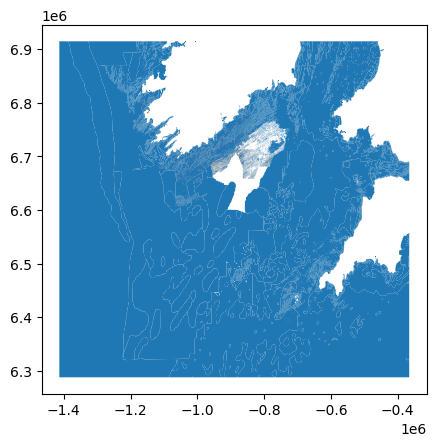

In [76]:
gdf.plot()

OPEN EMODNET SEABED BIOZONES

In [13]:
url_file = "https://ows.emodnet-seabedhabitats.eu/geoserver/emodnet_open/wfs?SERVICE=WFS&request=getFeature&VERSION=2.0.0&typeName=emodnet_open:eusm2021_bio_full&outputFormat=application/json&bbox=-1413232,6288190,-365497,6914553"
r = requests.get(url_file)
with open('haigfras_seabed.geojson', 'w') as f:
   dump(r.json, f)
with open('haigfras_seabed.geojson') as f:
    gj = geojson.load(f)

In [14]:
for item in gj['features']:
    del item["properties"]['geom_200']
    del item["properties"]['geom_400']
    del item["properties"]['geom_800']

In [84]:
with open('haigfras.geojson', 'w') as f:
   dump(gj, f)

In [24]:
# gj['features'][0].keys()

dict_keys(['type', 'geometry_name', 'bbox', 'id', 'geometry', 'properties'])

In [2]:
df = geopandas.read_file('haigfras.geojson')
new_df = geopandas.clip(gdf=df, mask=[-1413232,6288190,-365497,6914553], keep_geom_type=False)

In [56]:
# df_exploded = df.explode(column='geometry')

/tmp/ipykernel_10620/477122882.py:1: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df_exploded = df.explode(column='geometry')


In [4]:
new_df.to_file("haigfras_jasmin.geojson", driver='GeoJSON')


In [94]:
new_df.head(10)

,id,biozone,shape_length,shape_area,geometry
2,eusm2021_bio_full.95785,Atlantic upper abyssal,9.874703e+07,2.060958e+12,"POLYGON ((-1413232.000 6403810.186, -1413232.0..."
1002,eusm2021_bio_full.42856,Atlantic lower bathyal,1.235303e+08,2.269562e+12,"MULTIPOLYGON (((-1413232.000 6333391.140, -141..."
2019,eusm2021_bio_full.122340,Atlanto-Mediterranean mid bathyal,5.861292e+02,2.053691e+04,"POLYGON ((-1404017.078 6292023.474, -1403901.1..."
11,eusm2021_bio_full.33787,Atlantic lower bathyal,5.861362e+02,2.053732e+04,"POLYGON ((-1403901.120 6292023.474, -1404017.0..."
2022,eusm2021_bio_full.122341,Atlanto-Mediterranean mid bathyal,9.403948e+02,4.107684e+04,"POLYGON ((-1404480.909 6292731.938, -1404480.9..."
2023,eusm2021_bio_full.122342,Atlanto-Mediterranean mid bathyal,5.861660e+02,2.053905e+04,"POLYGON ((-1404944.740 6292909.063, -1404828.7..."
2024,eusm2021_bio_full.122343,Atlanto-Mediterranean mid bathyal,5.861736e+02,2.053949e+04,"POLYGON ((-1404944.740 6292909.063, -1405060.6..."
2025,eusm2021_bio_full.122344,Atlanto-Mediterranean mid bathyal,5.861814e+02,2.053995e+04,"POLYGON ((-1404712.824 6293086.192, -1404828.7..."
14,eusm2021_bio_full.33790,Atlantic lower bathyal,5.862110e+02,2.054166e+04,"POLYGON ((-1404248.993 6293794.746, -1404364.9..."
15,eusm2021_bio_full.33791,Atlantic lower bathyal,3.285439e+03,2.465115e+05,"POLYGON ((-1404944.740 6293794.746, -1405060.6..."


In [95]:
len(new_df.id.unique())

9054

<AxesSubplot:>

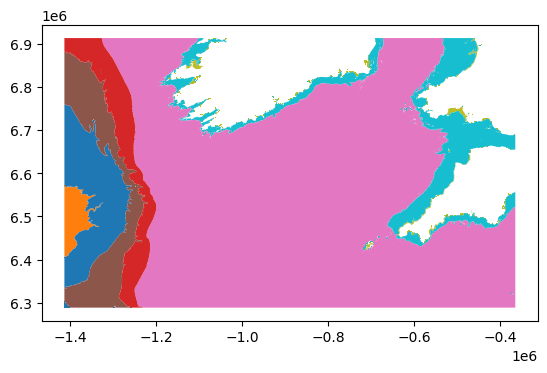

In [70]:
new_df.plot(column='biozone')

In [ ]:
features = []
for i, y in enumerate(xds.y.values):
    for j, x in enumerate(xds.x.values):
        point = Point((y, x))
        feature = Feature(geometry=point,  properties = {'depth': int(xds.values[0][i][j].round(0))})
        features.append(feature)

In [10]:
import gdaltools
import geopandas

In [5]:
ogr = gdaltools.ogr2ogr()

In [6]:
ogr.set_input("myfile_3.geojson", srs="EPSG:3857")
ogr.set_output("myfile_7.geojson", srs="EPSG:4326")
ogr.execute()

b''

In [ ]:
conn = gdaltools.PgConnectionString(host="localhost", port=5432, dbname="scolab", schema="data", user="myuser", password="mypass")
ogr.set_input(conn, table_name="roads", srs="EPSG:4326")
ogr.set_output("mydb.sqlite", srs="EPSG:25830")
ogr.execute()

In [41]:
import geojson
with open(url_file) as f:
    gj = geojson.load(f)

FileNotFoundError: [Errno 2] No such file or directory: 'https://ows.emodnet-seabedhabitats.eu/geoserver/emodnet_open/wfs?SERVICE=WFS&request=getFeature&VERSION=2.0.0&typeName=emodnet_open:eusm2021_bio_full&outputFormat=application/json'